In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## Data Importing and Processing

In [2]:
dc = pd.read_csv(r'C:\Users\SURYA_TEJA\OneDrive - Ultraviolette Automotive Private Limited\UV\Testing\Drive_cycle_derivation\Code\VBN_10\comb_data.csv')

In [3]:
time = dc['Millis'].to_numpy()
speed = dc['Speed'].to_numpy()

In [4]:
diff = [((speed[i+1]-speed[i-1])/3.6)/(time[i+1]-time[i-1]) for i in np.arange(1,len(time)-1)]
accn = np.insert(diff,0,0)
accn = np.append(accn,0)

In [5]:
df_calc = pd.DataFrame({'time_s':time,'speed_kmph':speed,'accn_mps2':accn})

### RawPlot

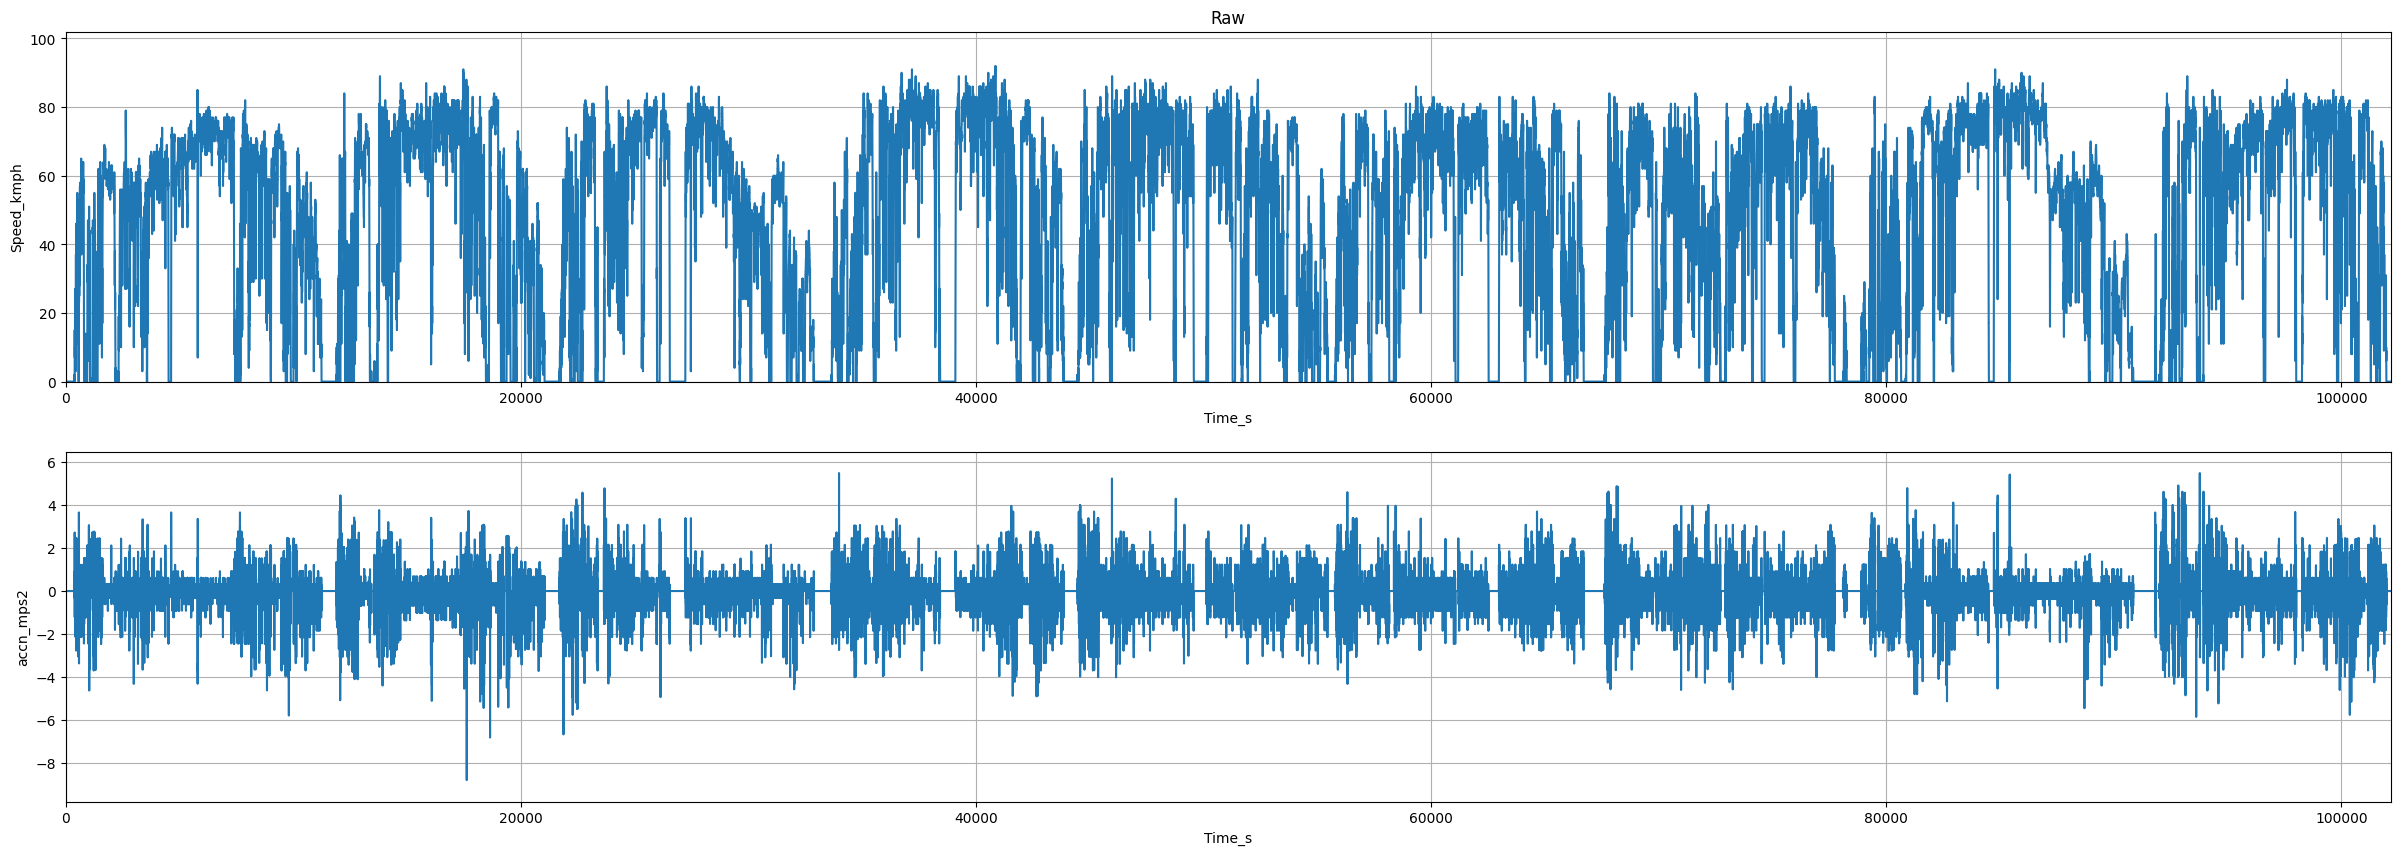

In [6]:
fig,ax = plt.subplots(2,1,figsize=[30,10])

#Speed plot
ax[0].plot(df_calc['time_s'],df_calc['speed_kmph'])
ax[0].set_xlim([0, df_calc['time_s'].max()])
ax[0].set_ylim([0, df_calc['speed_kmph'].max()+10])
ax[0].set_title('Raw')
ax[0].set_xlabel('Time_s')
ax[0].set_ylabel('Speed_kmph')
ax[0].grid()

#Accn plot
ax[1].plot(df_calc['time_s'],df_calc['accn_mps2'])
ax[1].set_xlim([0, df_calc['time_s'].max()])
ax[1].set_ylim([df_calc['accn_mps2'].min()-1, df_calc['accn_mps2'].max()+1])
ax[1].set_xlabel('Time_s')
ax[1].set_ylabel('accn_mps2')
ax[1].grid()

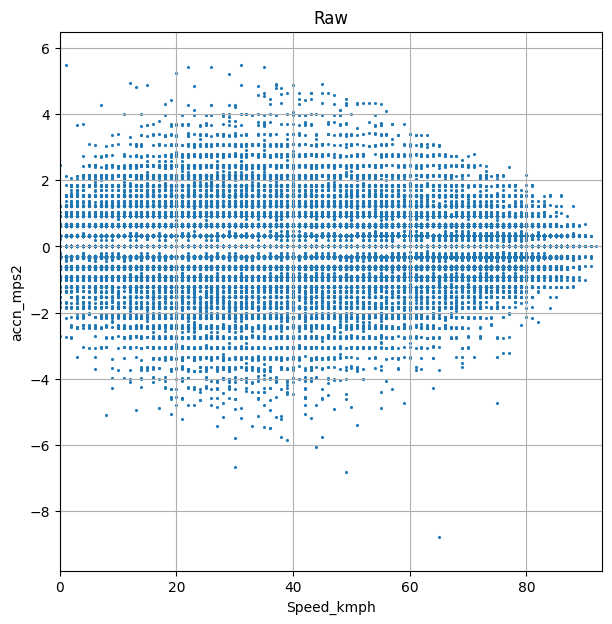

In [11]:
fig,ax = plt.subplots(1,1,figsize=[7,7])
ax.scatter(df_calc['speed_kmph'],df_calc['accn_mps2'],s=1.5)
ax.set_xlim([df_calc['speed_kmph'].min(), df_calc['speed_kmph'].max()+1])
ax.set_ylim([df_calc['accn_mps2'].min()-1, df_calc['accn_mps2'].max()+1])
ax.set_title('Raw')
ax.set_xlabel('Speed_kmph')
ax.set_ylabel('accn_mps2')
ax.grid()

### masked

In [12]:
def preprocess_data(time, speed, acceleration):
    # Remove outliers (e.g. speeds above 80 mph or accelerations above 1 g)
    mask = (speed >= 0) & (speed <= 80) & (np.abs(acceleration) > 0) & (np.abs(acceleration) <= 3)
    time = time[mask]
    speed = speed[mask]
    acceleration = acceleration[mask]
    return time, speed, acceleration

In [13]:
df_calc['time_s'],df_calc['speed_kmph'],df_calc['accn_mps2'] = preprocess_data(df_calc['time_s'],df_calc['speed_kmph'],df_calc['accn_mps2'])

In [14]:
df_calc = df_calc.dropna()

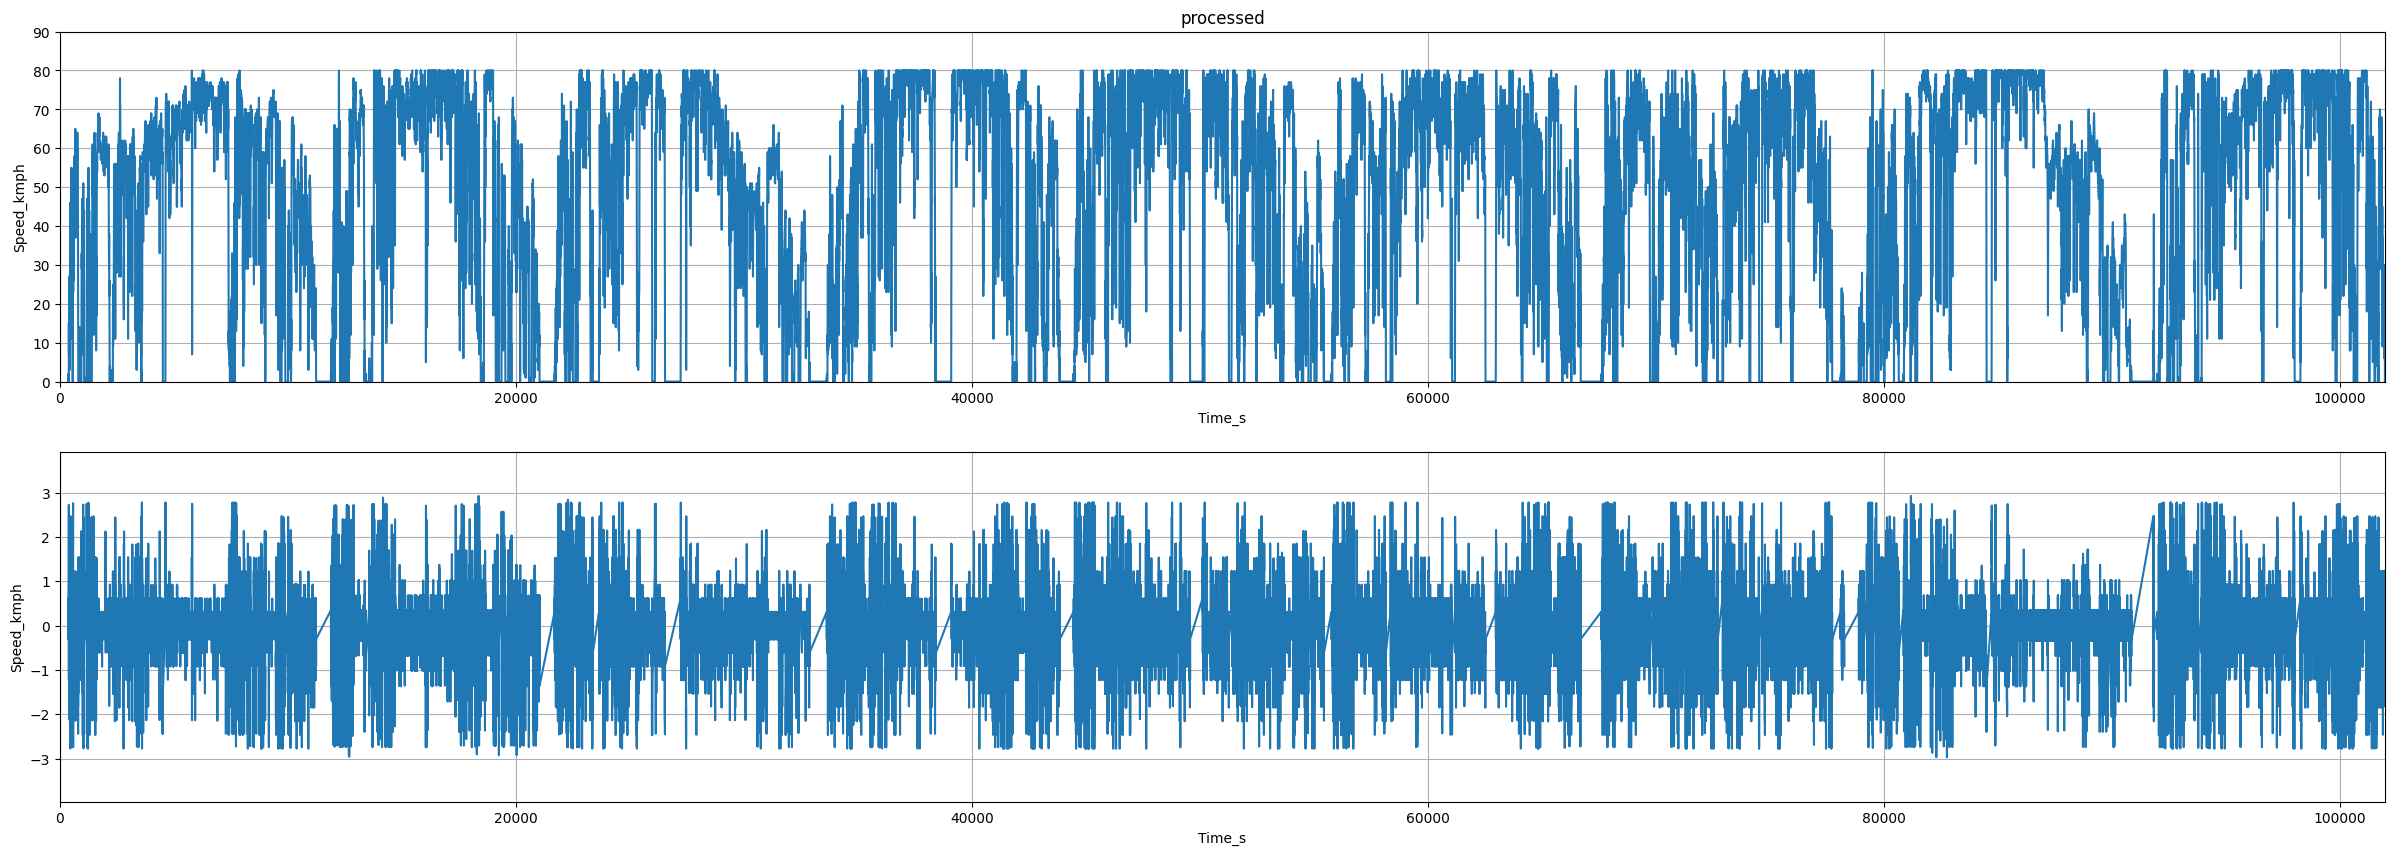

In [15]:
fig2,ax = plt.subplots(2,1,figsize=[30,10])

#Speed plot
ax[0].plot(df_calc['time_s'],df_calc['speed_kmph'])
ax[0].set_xlim([0, df_calc['time_s'].max()])
ax[0].set_ylim([0, df_calc['speed_kmph'].max()+10])
ax[0].set_title('processed')
ax[0].set_xlabel('Time_s')
ax[0].set_ylabel('Speed_kmph')
ax[0].grid()

#Accn plot
ax[1].plot(df_calc['time_s'],df_calc['accn_mps2'])
ax[1].set_xlim([0, df_calc['time_s'].max()])
ax[1].set_ylim([df_calc['accn_mps2'].min()-1, df_calc['accn_mps2'].max()+1])
ax[1].set_xlabel('Time_s')
ax[1].set_ylabel('Speed_kmph')
ax[1].grid()

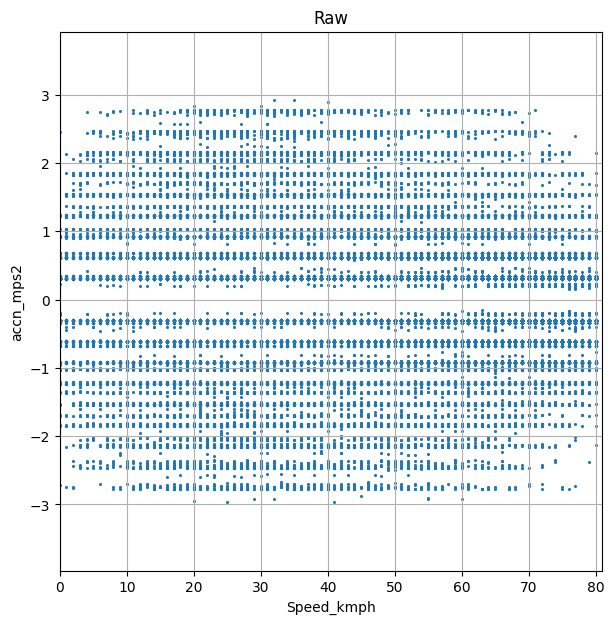

In [16]:
fig,ax = plt.subplots(1,1,figsize=[7,7])
ax.scatter(df_calc['speed_kmph'],df_calc['accn_mps2'],s=1.5)
ax.set_xlim([df_calc['speed_kmph'].min(), df_calc['speed_kmph'].max()+1])
ax.set_ylim([df_calc['accn_mps2'].min()-1, df_calc['accn_mps2'].max()+1])
ax.set_title('Raw')
ax.set_xlabel('Speed_kmph')
ax.set_ylabel('accn_mps2')
ax.grid()

## Function

In [25]:
# import numpy as np

# def create_transition_matrix(velocity, acceleration, velocity_bins, acceleration_bins):
#     # Calculate the relative velocity changes (delta v) and relative acceleration changes (delta a)
#     delta_v = np.diff(velocity)
#     print(delta_v)
#     delta_a = np.diff(acceleration)

#     # Bin the relative velocity changes into the predefined ranges to define the states
#     delta_v_states = np.digitize(delta_v, velocity_bins) - 1

#     # Bin the relative acceleration changes into the predefined ranges to define the states
#     delta_a_states = np.digitize(delta_a, acceleration_bins) - 1

#     # Get the number of states for delta v and delta a
#     num_states_dv = len(velocity_bins) - 1
#     num_states_da = len(acceleration_bins) - 1

#     # Create a dictionary to store the state transitions
#     state_transitions = {}
#     for i in range(num_states_dv):
#         for j in range(num_states_da):
#             for k in range(num_states_dv):
#                 for l in range(num_states_da):
#                     state_transitions[(i, j, k, l)] = 0

#     # Find the state transitions by comparing consecutive delta v and delta a pairs
#     for i in range(len(delta_v) - 1):
#         current_state_dv = delta_v_states[i]
#         next_state_dv = delta_v_states[i + 1]
#         current_state_da = delta_a_states[i]
#         next_state_da = delta_a_states[i + 1]
#         if (current_state_dv, current_state_da, next_state_dv, next_state_da) in state_transitions:
#             state_transitions[(current_state_dv, current_state_da, next_state_dv, next_state_da)] += 1

#     # Normalize the state transitions to get the transition probabilities
#     transition_matrix = np.zeros((num_states_dv, num_states_da, num_states_dv, num_states_da))
#     for i in range(num_states_dv):
#         for j in range(num_states_da):
#             total_transitions = sum(state_transitions[(i, j, k, l)] for k in range(num_states_dv) for l in range(num_states_da))
#             for k in range(num_states_dv):
#                 for l in range(num_states_da):
#                     if (i, j, k, l) in state_transitions:
#                         transition_matrix[i, j, k, l] = state_transitions[(i, j, k, l)] / total_transitions if total_transitions > 0 else 0
    
#     transition_matrix = np.nan_to_num(transition_matrix)

#     return transition_matrix


In [12]:
import numpy as np

def create_transition_matrix(velocity, acceleration, velocity_bins, acceleration_bins):
    # Bin the velocity values into the predefined ranges to define the states
    velocity_states = np.digitize(velocity, velocity_bins) - 1

    # Bin the acceleration values into the predefined ranges to define the states
    acceleration_states = np.digitize(acceleration, acceleration_bins) - 1

    # Get the number of states for velocity and acceleration
    num_states_v = len(velocity_bins) - 1
    num_states_a = len(acceleration_bins) - 1

    # Create a dictionary to store the state transitions
    state_transitions = {}
    for i in range(num_states_v):
        for j in range(num_states_a):
            for k in range(num_states_v):
                for l in range(num_states_a):
                    state_transitions[(i, j, k, l)] = 0

    # Find the state transitions by comparing consecutive velocity and acceleration pairs
    for i in range(len(velocity) - 1):
        current_state_v = velocity_states[i]
        next_state_v = velocity_states[i + 1]
        current_state_a = acceleration_states[i]
        next_state_a = acceleration_states[i + 1]
        if (current_state_v, current_state_a, next_state_v, next_state_a) in state_transitions:
            state_transitions[(current_state_v, current_state_a, next_state_v, next_state_a)] += 1

    # Normalize the state transitions to get the transition probabilities
    transition_matrix = np.zeros((num_states_v, num_states_a, num_states_v, num_states_a))
    for i in range(num_states_v):
        for j in range(num_states_a):
            total_transitions = sum(state_transitions[(i, j, k, l)] for k in range(num_states_v) for l in range(num_states_a))
            for k in range(num_states_v):
                for l in range(num_states_a):
                    if (i, j, k, l) in state_transitions:
                        transition_matrix[i, j, k, l] = state_transitions[(i, j, k, l)] / total_transitions if total_transitions > 0 else 0
    
    transition_matrix = np.nan_to_num(transition_matrix)

    return transition_matrix


In [14]:
def simulate_markov_chain(transition_matrix, velocity, acceleration, velocity_bins, acceleration_bins, initial_velocity,initial_acceleration, t):
    # velocity_states = np.digitize(velocity, velocity_bins) - 1
    # acceleration_states = np.digitize(acceleration, acceleration_bins) - 1
    
    # Get the initial state based on the initial velocity
    initial_state_v = np.digitize([initial_velocity], velocity_bins)[0] - 1
    initial_state_a = np.digitize([initial_acceleration], acceleration_bins)[0] - 1
    
    # Initialize the current state
    current_state_v = initial_state_v
    current_state_a = initial_state_a
    
    # Initialize arrays to store the generated velocity and acceleration values
    generated_velocities = np.zeros(t)
    generated_accelerations = np.zeros(t)
    generated_time = np.zeros(t)

    generated_time[0] = 0
    generated_velocities[0] = initial_velocity
    generated_accelerations[0] = initial_acceleration
    
    # Normalize the transition matrix so that the probabilities sum to 1
    transition_matrix = transition_matrix + 1e-9
    transition_matrix = transition_matrix / np.sum(transition_matrix, axis=(2, 3), keepdims=True)
    
    # Run the simulation for t seconds
    for i in range(1, t):
        # Choose the next state based on the transition probabilities
        transition_probabilities = transition_matrix[current_state_v, current_state_a, :, :].flatten()
        transition_probabilities /= transition_probabilities.sum()

        # transition_probabilities is an array of transition probabilities for the current state
        # highest_prob_states = np.where(transition_probabilities == np.max(transition_probabilities))[0]
        # next_state = np.random.choice(highest_prob_states)

        next_state = np.random.choice((len(velocity_bins) - 1) * (len(acceleration_bins) - 1), p=transition_probabilities)
        print(next_state)
    
        next_state_v = next_state // (len(acceleration_bins) - 1)
        next_state_a = next_state % (len(acceleration_bins) - 1)
        
        # Convert the states to actual values
        generated_velocity = velocity_bins[next_state_v]
        generated_acceleration = acceleration_bins[next_state_a]
        
        # Store the generated values in the arrays
        generated_time[i] = i
        generated_velocities[i] = generated_velocity
        generated_accelerations[i] = generated_acceleration
        
        # Update the current state
        current_state_v = next_state_v
        current_state_a = next_state_a
    
    return generated_time, generated_velocities, generated_accelerations

In [15]:
# def simulate_markov_chain(transition_matrix, velocity, acceleration, velocity_bins, acceleration_bins, initial_velocity,initial_acceleration, t):
#     velocity_states = np.digitize(velocity, velocity_bins) - 1
#     acceleration_states = np.digitize(acceleration, acceleration_bins) - 1
    
#     # Get the initial state based on the initial velocity
#     initial_state_v = np.digitize([initial_velocity], velocity_bins)[0] - 1
#     initial_state_a = np.digitize([initial_acceleration], acceleration_bins)[0] - 1
    
#     # Initialize the current state
#     current_state_v = initial_state_v
#     current_state_a = initial_state_a

#     #get the initial velocity
#     transition_velocity = initial_velocity
    
#     # Initialize arrays to store the generated velocity and acceleration values
#     generated_velocities = np.zeros(t)
#     generated_accelerations = np.zeros(t)
#     generated_time = np.zeros(t)

#     generated_time[0] = 0
#     generated_velocities[0] = initial_velocity
#     generated_accelerations[0] = initial_acceleration
    
#     # Normalize the transition matrix so that the probabilities sum to 1
#     transition_matrix = transition_matrix + 1e-9
#     transition_matrix = transition_matrix / np.sum(transition_matrix, axis=(2, 3), keepdims=True)
    
#     # Run the simulation for t seconds
#     for i in range(1, t):
#         # Choose the next state based on the transition probabilities
#         transition_probabilities = transition_matrix[current_state_v, current_state_a, :, :].flatten()
#         transition_probabilities /= transition_probabilities.sum()

#         # transition_probabilities is an array of transition probabilities for the current state
#         # highest_prob_states = np.where(transition_probabilities == np.max(transition_probabilities))[0]
#         # next_state = np.random.choice(highest_prob_states)

#         next_state = np.random.choice((len(velocity_bins) - 1) * (len(acceleration_bins) - 1), p=transition_probabilities)
    
#         next_state_v = next_state // (len(acceleration_bins) - 1)
#         next_state_a = next_state % (len(acceleration_bins) - 1)
        
#         # Convert the states to actual values
#         generated_velocity_tpm = velocity_bins[next_state_v]
#         generated_acceleration_tpm = acceleration_bins[next_state_a]

#         r_acceleration = generated_acceleration_tpm

#         generated_velocity = (transition_velocity/3.6 + r_acceleration)*3.6

        
#         # Store the generated values in the arrays
#         generated_time[i] = i
#         generated_velocities[i] = generated_velocity
#         generated_accelerations[i] = r_acceleration

#         current_state_v = np.digitize([generated_velocity], velocity_bins)[0] - 1
#         current_state_a = np.digitize([r_acceleration], acceleration_bins)[0] - 1
        
#         # Update the current state
#         # current_state_v = next_state_v
#         # current_state_a = next_state_a
    
#     return generated_time, generated_velocities, generated_accelerations

In [16]:
def generate_drive_cycle(transition_matrix, velocity, acceleration,velocity_bins, acceleration_bins, initial_velocity, initial_acceleration, target_distance, t,
                         target_mean_velocity, target_rms_positive_acceleration,target_rms_negative_acceleration):
    while True:
        # Generate the drive cycle
        generated_time, generated_velocities, generated_accelerations = simulate_markov_chain(transition_matrix, velocity, acceleration,
                                                                                               velocity_bins, acceleration_bins,
                                                                                               initial_velocity, initial_acceleration, t)
        time = generated_time
        speed = generated_velocities
        diff = [((speed[i+1]-speed[i-1])/3.6)/(time[i+1]-time[i-1]) for i in np.arange(1,len(time)-1)]
        accn_mps2 = np.insert(diff,0,0)
        accn_mps2 = np.append(accn_mps2,0)
        
        # Compute the derived variables
        distance_covered = (np.trapz(generated_velocities/3.6, x=generated_time))/1000
        max_velocity = np.max(generated_velocities)
        mean_velocity = np.mean(generated_velocities[generated_velocities>0])
        positive_accelerations = accn_mps2[accn_mps2 > 0]
        negative_accelerations = accn_mps2[accn_mps2 < 0]
        max_positive_acceleration = np.max(positive_accelerations) if len(positive_accelerations) > 0 else 0
        mean_positive_acceleration = np.mean(positive_accelerations) if len(positive_accelerations) > 0 else 0
        rms_positive_acceleration = np.sqrt(np.mean(positive_accelerations ** 2)) if len(positive_accelerations) > 0 else 0
        max_negative_acceleration = np.min(negative_accelerations) if len(negative_accelerations) > 0 else 0
        mean_negative_acceleration = np.mean(negative_accelerations) if len(negative_accelerations) > 0 else 0
        rms_negative_acceleration = np.sqrt(np.mean(negative_accelerations ** 2)) if len(negative_accelerations) > 0 else 0

        # Return the drive cycle and the derived variables
        drive_cycle = pd.DataFrame({
            'time_s': generated_time,
            'speed_kmph': generated_velocities,
            'accn_mps2' : accn_mps2,
            'p_accn_mps2': generated_accelerations
        })
        
        derived_variables = {
            'distance_covered': distance_covered,
            'max_velocity': max_velocity,
            'mean_velocity': mean_velocity,
            'max_positive_acceleration': max_positive_acceleration,
            'mean_positive_acceleration': mean_positive_acceleration,
            'rms_positive_acceleration': rms_positive_acceleration,
            'max_negative_acceleration': max_negative_acceleration,
            'mean_negative_acceleration': mean_negative_acceleration,
            'rms_negative_acceleration': rms_negative_acceleration
        }
        
        # Check if the conditions are met
        if (distance_covered >= target_distance) and \
            (mean_velocity >= target_mean_velocity) and \
            (rms_positive_acceleration >= target_rms_positive_acceleration) and \
            (rms_negative_acceleration >= target_rms_negative_acceleration):
            break
        

    # Return the drive cycle and the derived variables
    drive_cycle = pd.DataFrame({
        'time_s': generated_time,
        'speed_kmph': generated_velocities,
        'accn_mps2' : accn_mps2,
        'p_accn_mps2': generated_accelerations
    })
    
    derived_variables = {
        'distance_covered': distance_covered,
        'max_velocity': max_velocity,
        'mean_velocity': mean_velocity,
        'max_positive_acceleration': max_positive_acceleration,
        'mean_positive_acceleration': mean_positive_acceleration,
        'rms_positive_acceleration': rms_positive_acceleration,
        'max_negative_acceleration': max_negative_acceleration,
        'mean_negative_acceleration': mean_negative_acceleration,
        'rms_negative_acceleration': rms_negative_acceleration
    }
    
    return drive_cycle, derived_variables


## Drivecycle generation

In [17]:
sa_matrix_data = {'speed':df_calc.speed_kmph.to_list(),
                'accn':df_calc.accn_mps2.to_list(),
                'bins_speed': np.round(np.arange(np.ceil(df_calc.speed_kmph.max())+1).tolist(),2),
                'bins_accn': np.round(np.arange(np.ceil(df_calc.accn_mps2.min()*10)/10,np.ceil(df_calc.accn_mps2.max()*10)/10+0.1,0.1).tolist(),2),
                'initial_velocity': 0,
                'initial_acceleration': 0.2} 

In [18]:
target_param = {'target_distance': 8, 
                't': 600,
                'target_mean_velocity':55, 
                'target_rms_positive_acceleration':0.4,
                'target_rms_negative_acceleration':0.4,
                'target_max_positive_acceleration':1.5,
                'target_max_negative_acceleration':-1.5}

In [19]:
velocity = sa_matrix_data['speed']
acceleration = sa_matrix_data['accn']
velocity_bins = sa_matrix_data['bins_speed']
acceleration_bins = sa_matrix_data['bins_accn']
initial_velocity = sa_matrix_data['initial_velocity']
initial_acceleration = sa_matrix_data['initial_acceleration']

In [20]:
t = target_param['t']
target_distance = target_param['target_distance']
target_mean_velocity = target_param['target_mean_velocity']
target_rms_positive_acceleration = target_param['target_rms_positive_acceleration']
target_rms_negative_acceleration = target_param['target_rms_negative_acceleration']
# target_max_positive_acceleration = target_param['target_max_positive_acceleration']
# target_max_negative_acceleration = target_param['target_max_negative_acceleration']

In [21]:
transition_matrix = create_transition_matrix(velocity, acceleration, velocity_bins, acceleration_bins)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Surya_Teja\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Surya_Teja\AppData\Local\Temp\ipykernel_24992\1967226294.py", line 1, in <module>
    transition_matrix = create_transition_matrix(velocity, acceleration, velocity_bins, acceleration_bins)
  File "C:\Users\Surya_Teja\AppData\Local\Temp\ipykernel_24992\3668755226.py", line -1, in create_transition_matrix
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Surya_Teja\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "c:\Users\Surya_Teja\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\ultratb.py", line 1396,

In [40]:
# [p_time,p_vel,p_accn] = simulate_markov_chain(transition_matrix, velocity, acceleration, velocity_bins, acceleration_bins, initial_velocity, initial_acceleration, t)

In [41]:
[drive_cycle, derived_variables] = generate_drive_cycle(transition_matrix, velocity, acceleration,velocity_bins, acceleration_bins, 
                                                        initial_velocity, initial_acceleration, target_distance, t,
                                                        target_mean_velocity, 
                                                        target_rms_positive_acceleration,target_rms_negative_acceleration)


In [42]:
# dc_pred = pd.DataFrame({'time_s':p_time,'speed_kmph':p_vel,'p_accn_mps2':p_accn})
dc_pred = drive_cycle

In [100]:
# #use only if simulate_markov_chain is used alone instead of loop

# time = dc_pred['time_s'].to_numpy()
# speed = dc_pred['speed_kmph'].to_numpy()
# diff = [((speed[i+1]-speed[i-1])/3.6)/(time[i+1]-time[i-1]) for i in np.arange(1,len(time)-1)]
# accn = np.insert(diff,0,0)
# accn = np.append(accn,0)
# dc_pred['accn_mps2'] = accn


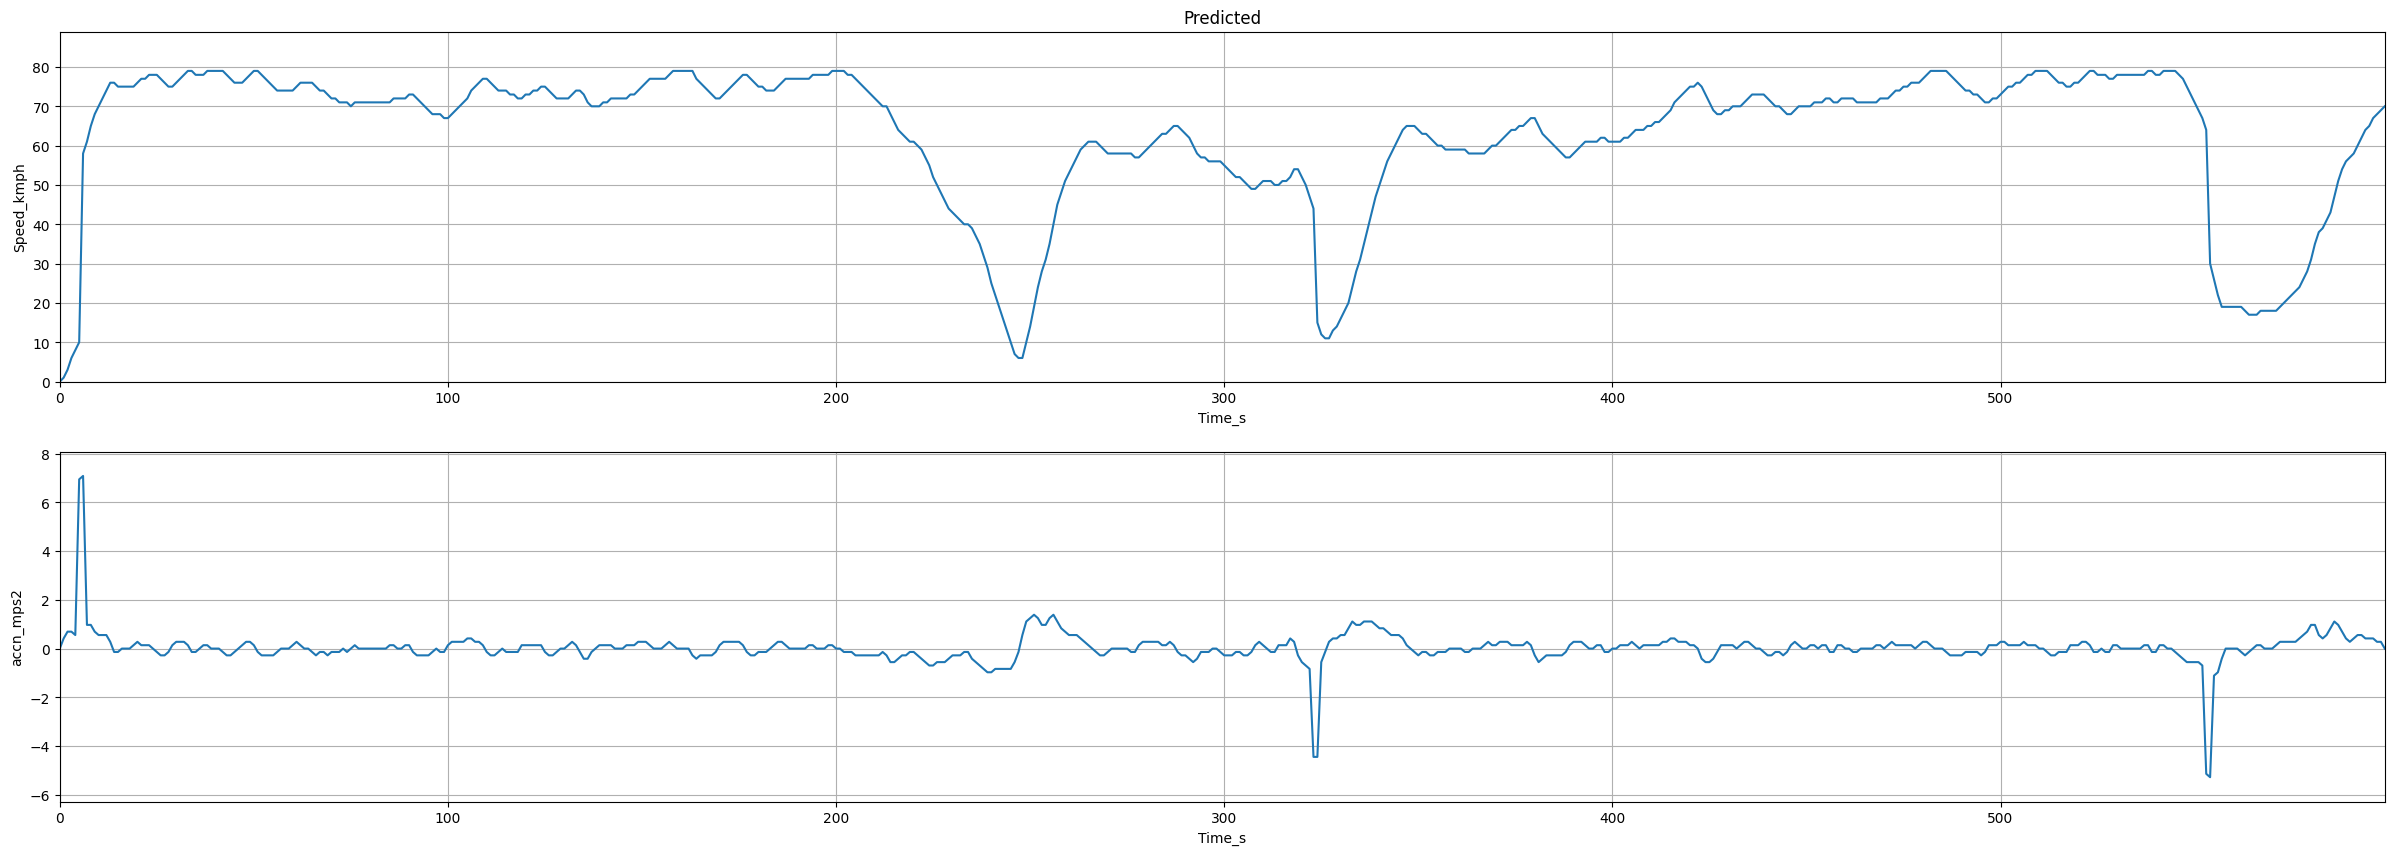

In [43]:
fig,ax = plt.subplots(2,1,figsize=[30,10])

#Speed plot
ax[0].plot(dc_pred['time_s'],dc_pred['speed_kmph'])
ax[0].set_xlim([0, dc_pred['time_s'].max()])
# ax[0].set_xlim([1000, 1200])
ax[0].set_ylim([0, dc_pred['speed_kmph'].max()+10])
ax[0].set_title('Predicted')
ax[0].set_xlabel('Time_s')
ax[0].set_ylabel('Speed_kmph')
ax[0].grid()

#Accn plot
ax[1].plot(dc_pred['time_s'],dc_pred['accn_mps2'])
ax[1].set_xlim([0, dc_pred['time_s'].max()])
# ax[1].set_xlim([1000, 1200])
ax[1].set_ylim([dc_pred['accn_mps2'].min()-1, dc_pred['accn_mps2'].max()+1])
ax[1].set_xlabel('Time_s')
ax[1].set_ylabel('accn_mps2')
ax[1].grid()

In [485]:
print(derived_variables)

{'distance_covered': 9.296944444444446, 'max_velocity': 79.0, 'mean_velocity': 58.20695652173913, 'max_positive_acceleration': 5.972222222222222, 'mean_positive_acceleration': 0.3362573099415205, 'rms_positive_acceleration': 0.699703929879005, 'max_negative_acceleration': -4.027777777777778, 'mean_negative_acceleration': -0.3451430472388556, 'rms_negative_acceleration': 0.547914013011054}


In [486]:
dc_pred.to_excel(r"C:\Users\SURYA TEJA\OneDrive - Ultraviolette Automotive Private Limited\UV\Testing\Drive_cycle_derivation\Code\VBN_10\generated_WMTC_DC\3_high_speed\hs_itr3.xlsx",sheet_name="itr3", index= False)